In [60]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import airportsdata
import random

In [61]:
airports = airportsdata.load()
# Replace non-ascii characters
for (k,v) in airports.items():
    old = airports[k]['name']
    airports[k]['name'] = ''.join([i if ord(i) < 128 else ' ' for i in old])

In [95]:
# Load dataset
g_2019 = nx.read_gml("flightlist_20191201_20191231.gml")
#flight_feb_20 = nx.read_gml("flightlist_20200201_20200229.gml")
g_2020_apr = nx.read_gml("flightlist_20200401_20200430.gml")

Dataset: Flight dataset Dec.2019
The average degree is: 32.874213836477985


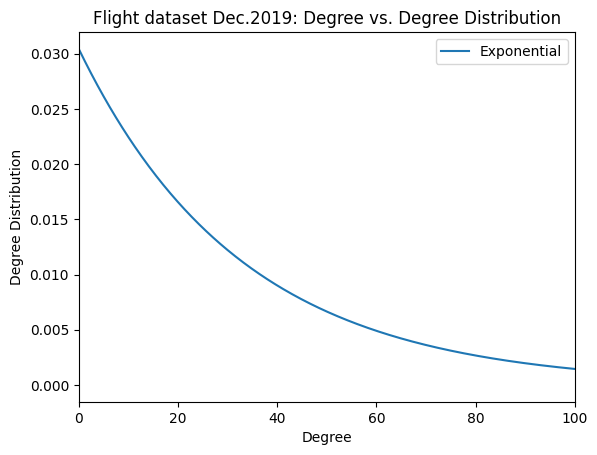

--------------------------------------------------------------------
Dataset: Flight dataset Apr.2020
The average degree is: 19.440976933514246


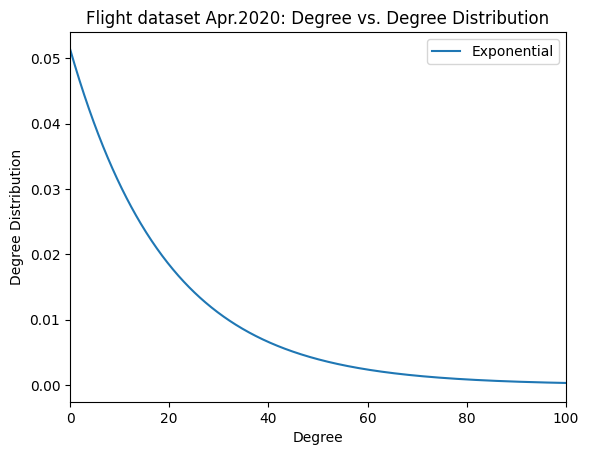

--------------------------------------------------------------------


In [93]:
# The WAN data reveals a scale-free behavior with an exponential cutoff
# the exponential distribution with mean value equal to ⟨𝑘⟩. 

def expo(k, lamda):
    return lamda**(-1) * np.exp(-k/lamda)

def myfunc(x,alpha):
    return x**(-alpha)

# Super mighty function ......
def dist_ave_pow(name, graph):
    print("Dataset: " + name)
    #Load degrees
    g_degrees = graph.degree()
    degrees = [ g_degrees[i] for i in graph.nodes() ]

    #Compute ave. degres
    sum_deg = []
    for i in degrees:
        sum_deg.append(i)
    ave_degree = sum(sum_deg) / len(sum_deg)
    print("The average degree is: " + str(ave_degree))

    # for expo
    k = np.sort(np.asarray([d for d in dict(graph.degree()).values()]), )
    spacing = np.linspace(min(k),max(k),len(k))

    #Create the plot
    # my_bins = np.logspace(np.log10(min(degrees)),np.log10(max(degrees) +1), 15 )
    # _ = plt.hist(degrees, bins = my_bins, density = True, label="Degree Dist.") 
    plt.plot(spacing,expo(spacing,ave_degree), label="Exponential")
    plt.title(name + ": Degree vs. Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Degree Distribution")
    
    plt.xlim([0, 100])
    plt.legend()
    plt.show()

    #Division between different datasets
    print("--------------------------------------------------------------------")


dist_ave_pow("Flight dataset Dec.2019", g_2019)
#dist_ave_pow("Flight dataset Feb.2020", flight_feb_20)
dist_ave_pow("Flight dataset Apr.2020", g_2020_apr)

In [108]:
def delete_random_elems(input_list, n):
    to_delete = set(random.sample(range(len(input_list)), n))
    return [x for i,x in enumerate(input_list) if i in to_delete]
# Remove core
#k = nx.average_degree_connectivity(graph)

#1. Average fraction of nodes as a function of removed nodes
removed_fraction_nodes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]

NG_2019 = []
NG_2020_apr = []
#C = []

for i in removed_fraction_nodes:
    g_2019 = nx.read_gml("flightlist_20191201_20191231.gml")
    g_2020_apr = nx.read_gml("flightlist_20200401_20200430.gml")

    nodes_dec_19 = g_2019.nodes()
    nodes_apr_20 = g_2020_apr.nodes()

    # Random remove
    g_2019.remove_nodes_from(delete_random_elems(nodes_dec_19, int(i * len(nodes_dec_19))))
    g_2020_apr.remove_nodes_from(delete_random_elems(nodes_apr_20, int(i * len(nodes_apr_20))))
    #print(len(delete_random_elems(nodes_dec_19, int(i * len(nodes_dec_19)))))
    print(nx.number_of_nodes(g_2019))

    # remove important nodes

    # for node in core_node: remove

    #flight_dec_19.remove_node()

    tmp_NG_19 = []
    tmp_NG_20_apr = []

    for j in range(501):
        #graph = nx.erdos_renyi_graph(200, i)
        # Largest Connected Component
        tmp_NG_19.append(len(max([c for c in nx.connected_components(g_2019)],key=len))/nx.number_of_nodes(g_2019))
        tmp_NG_20_apr.append(len(max([c for c in nx.connected_components(g_2020_apr)],key=len))/nx.number_of_nodes(g_2020_apr))
        #tmp_C.append(nx.average_clustering(g_2019))

    NG_2019.append(sum(tmp_NG_19)/len(tmp_NG_19))
    NG_2020_apr.append(sum(tmp_NG_20_apr)/len(tmp_NG_20_apr))
    #C.append(sum(tmp_C)/len(tmp_C))



1431
1272
1113
954
795
636
477
318
159
16


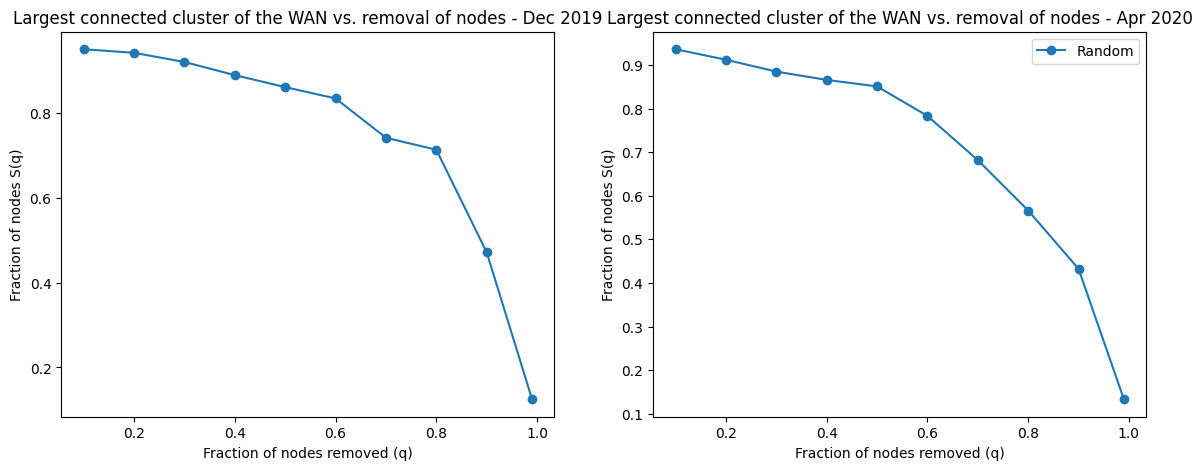

In [111]:
figure, axis = plt.subplots(1, 2, figsize=(14,5))

axis[0].plot(removed_fraction_nodes, NG_2019, marker='o', label="Random")
axis[0].set_title("Largest connected cluster of the WAN vs. removal of nodes - Dec 2019")
axis[0].set_xlabel("Fraction of nodes removed (q)")
axis[0].set_ylabel("Fraction of nodes S(q)")
# axis[0].set_xscale("log")
# axis[0].set_yscale("log")

axis[1].plot(removed_fraction_nodes, NG_2020_apr, marker='o', label="Random")
axis[1].set_title("Largest connected cluster of the WAN vs. removal of nodes - Apr 2020")
axis[1].set_xlabel("Fraction of nodes removed (q)")
axis[1].set_ylabel("Fraction of nodes S(q)")
# axis[1].set_xscale("log")
# axis[1].set_yscale("log")
axis[1].legend()

plt.show()